In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats

In [55]:
waves = pd.read_csv('data/reanalysis-era5-single-levels-timeseries-WaveP2.csv', parse_dates = True, index_col = 0, names=['date_&_time', 
                            'mean_wave_direction_(deg_N)',
                            'mean_wave_period_(s)',
                            'significant_wave_height_(m)',
                            'latitude',
                            'longitude'] , skiprows=1) 
display(waves)

,mean_wave_direction_(deg_N),mean_wave_period_(s),significant_wave_height_(m),latitude,longitude
date_&_time,,,,,
1940-01-01 00:00:00,308.697800,2.484964,0.280483,44.5,12.5
1940-01-01 01:00:00,309.649570,2.566502,0.277106,44.5,12.5
1940-01-01 02:00:00,310.111270,2.603852,0.268004,44.5,12.5
1940-01-01 03:00:00,311.775180,2.615621,0.263845,44.5,12.5
1940-01-01 04:00:00,314.782260,2.620293,0.259005,44.5,12.5
...,...,...,...,...,...
2024-04-30 19:00:00,74.443120,1.947217,0.133622,44.5,12.5
2024-04-30 20:00:00,89.669650,2.023138,0.141413,44.5,12.5
2024-04-30 21:00:00,103.551285,2.067456,0.149424,44.5,12.5


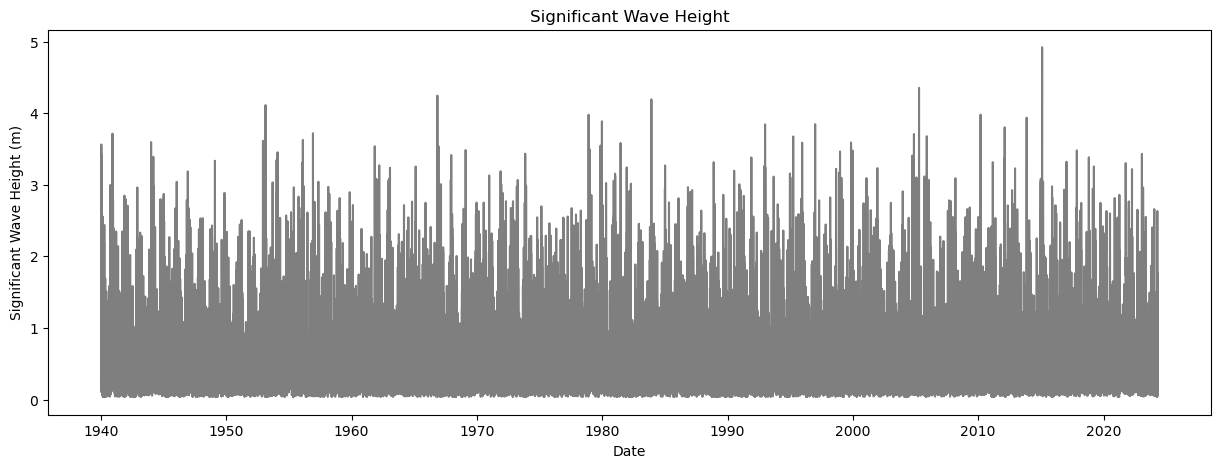

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(waves.index, waves['significant_wave_height_(m)'], label='significant wave height', color='k', alpha=0.5)
ax.set_title('Significant Wave Height')
ax.set_xlabel('Date')
ax.set_ylabel('Significant Wave Height (m)')
plt.show()
# # # # # 

In [31]:
mean = waves['significant_wave_height_(m)'].mean()
std = waves['significant_wave_height_(m)'].std()
skewness = waves['significant_wave_height_(m)'].skew()
kurtosis = waves['significant_wave_height_(m)'].kurtosis()

print(f"Mean: {mean}, Std: {std}, Skewness: {skewness}, Kurtosis: {kurtosis}")

print(waves.describe())

Mean: 0.4504203837197383, Std: 0.40805162481479573, Skewness: 2.557217558291107, Kurtosis: 8.92952240891723
       mean_wave_direction_(deg_N)  mean_wave_period_(s)  \
count                739248.000000         739248.000000   
mean                    122.751097              3.265745   
std                      89.353816              0.968121   
min                       0.000432              1.616072   
25%                      57.329515              2.520114   
50%                     106.401235              3.067097   
75%                     144.034500              3.836978   
max                     360.002040              8.878386   

       significant_wave_height_(m)  latitude  longitude  
count                739248.000000  739248.0   739248.0  
mean                      0.450420      44.5       12.5  
std                       0.408052       0.0        0.0  
min                       0.031843      44.5       12.5  
25%                       0.194766      44.5       12.5  
50%

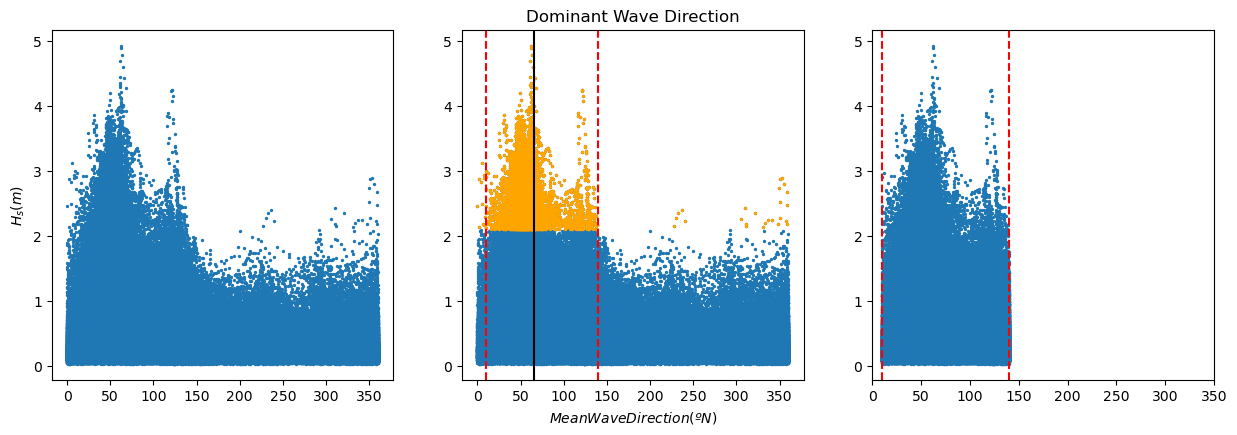

In [51]:
xlo = 10
xhi = 140

plt.figure(2, figsize = (15,10), facecolor='white')

plt.subplot(2,3,1)
plt.scatter(waves['mean_wave_direction_(deg_N)'], waves['significant_wave_height_(m)'], s = 2)
plt.ylabel('${H_s (m)}$')

# print(waves['significant_wave_height_(m)'].quantile(0.99))
waves_99 = waves[waves['significant_wave_height_(m)']>=waves['significant_wave_height_(m)'].quantile(0.99)]

plt.subplot(2,3,2)
plt.title('Dominant Wave Direction')
plt.scatter(waves['mean_wave_direction_(deg_N)'], waves['significant_wave_height_(m)'], s = 2)
plt.scatter(waves_99['mean_wave_direction_(deg_N)'], waves_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.axvline(x = xlo, color = 'r', linestyle = 'dashed')
plt.axvline(x = xhi, color = 'r', linestyle = 'dashed')
plt.axvline(x = 65, color = 'k')
plt.xlabel('$Mean Wave Direction (ºN)$')

waves_angle = waves[(waves['mean_wave_direction_(deg_N)'].between(xlo, xhi))]

plt.subplot(2,3,3)
plt.scatter(waves_angle['mean_wave_direction_(deg_N)'], waves_angle['significant_wave_height_(m)'], s = 2)
plt.axvline(x = xlo, color = 'r', linestyle = 'dashed')
plt.axvline(x = xhi, color = 'r', linestyle = 'dashed')
plt.xlim([0, 350])
plt.show()


C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_19616\4124643737.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))
c:\Users\TUDelftSID\anaconda3\envs\CIEM4220_DDB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


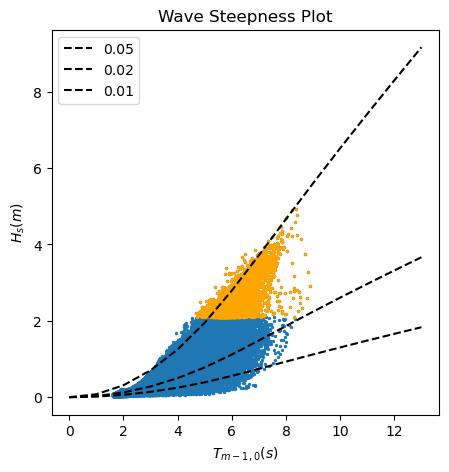

In [33]:
#Calculate theoretical wave steepness lines following the wave dispersion relationship.
N = 15
iterations = 20
Depth = 25
T_p = np.linspace(0,N,N+1)
L0 = 9.81*(T_p**2)/(2*np.pi) # Deep water wave length
L = np.zeros((iterations,len(T_p)))
L[0,:] = L0                # Initial guess for wave length = deep water wave length
L[0,0] = 0.1

# Calculate the wave periods using an iterative approach
for iL in np.arange(1,(len(L[:,0]))):
    for jL in np.arange(0,len(T_p)):
        L[iL,jL] =  L0[jL]*np.tanh(2*np.pi*(Depth/(L[iL-1,jL])))

# Compute theoretical significant wave heights for different steepnesses
Hs005 = L[-1,:]*0.05;
Hs002 = L[-1,:]*0.02;
Hs001 = L[-1,:]*0.01;

plt.figure(3, figsize = (5,5), facecolor='white')
plt.scatter(waves['mean_wave_period_(s)'], waves['significant_wave_height_(m)'], s = 2)
plt.scatter(waves_99['mean_wave_period_(s)'], waves_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.plot(T_p[:-2], Hs005[:-2], linestyle = 'dashed', color = 'black', label = 0.05)
plt.plot(T_p[:-2], Hs002[:-2], linestyle = 'dashed', color = 'black', label = 0.02)
plt.plot(T_p[:-2], Hs001[:-2], linestyle = 'dashed', color = 'black', label = 0.01)
plt.xlabel('${T_{m-1,0} (s)}$')
plt.ylabel('${H_s (m)}$')
plt.title('Wave Steepness Plot')
plt.legend()
plt.show()


7.802679947824025
658


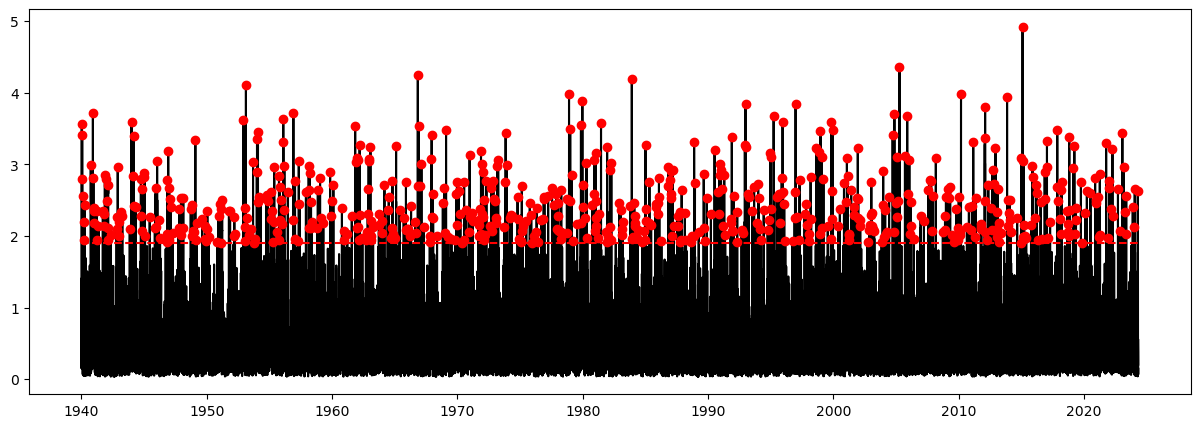

In [45]:
th = 1.9
d = 4 * 24 # hours
nyears = 84.33

peaks, _ = find_peaks(waves_angle['significant_wave_height_(m)'], height=th, distance=d)
peaklist = waves_angle.iloc[peaks]
Ns = len(peaklist) / (nyears)
print(Ns)
print(len(peaklist))

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(waves_angle.index, waves_angle['significant_wave_height_(m)'],'k', label='significant wave height')
ax.plot(peaklist.index, peaklist['significant_wave_height_(m)'], 'ro', label='peaks')
ax.hlines(th, waves_angle.index[0], waves_angle.index[-1], color='r', linestyle='--', label='threshold')

plt.show()

C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_19616\487644552.py:28: RuntimeWarning: divide by zero encountered in divide
  rtp_par = 1 / ((1-cdf_par) * Ns)


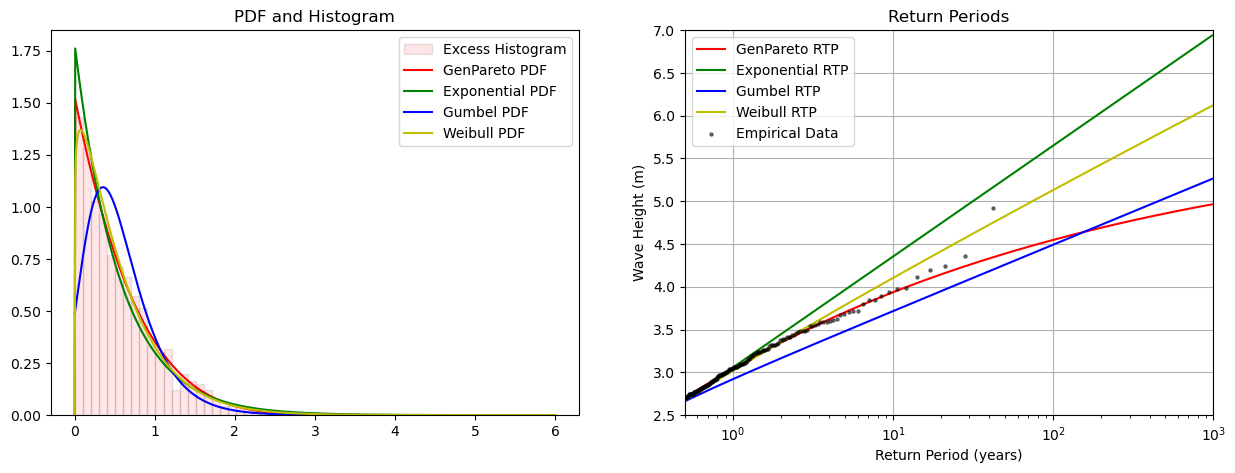

In [92]:
excess = peaklist['significant_wave_height_(m)'].values - th
params_par = stats.genpareto.fit(excess)
params_exp = stats.expon.fit(excess)
params_gum = stats.gumbel_r.fit(excess)
params_wei = stats.weibull_min.fit(excess)
excess_sorted = np.sort(excess)
# n_exceed = len(excess_sorted)
# emp_rtp = 1 / ((np.arange(1, n_exceed + 1)[::-1]) / (n_exceed + 1) * Ns)

emp_cdf = np.zeros(len(excess_sorted))
N = len(excess_sorted)
for i in range(len(excess_sorted)):
    emp_cdf[i] = 1 - (i / (N + 1))

emp_rtp = 1 / (emp_cdf * Ns)

x = np.linspace(0, 6, 1000)
pdf_par = stats.genpareto.pdf(x, *params_par)
pdf_exp = stats.expon.pdf(x, *params_exp)
pdf_gum = stats.gumbel_r.pdf(x, *params_gum)
pdf_wei = stats.weibull_min.pdf(x, *params_wei)

cdf_par = stats.genpareto.cdf(x, *params_par)
cdf_exp = stats.expon.cdf(x, *params_exp)
cdf_gum = stats.gumbel_r.cdf(x, *params_gum)
cdf_wei = stats.weibull_min.cdf(x, *params_wei)

rtp_par = 1 / ((1-cdf_par) * Ns)
rtp_exp = 1 / ((1-cdf_exp) * Ns)
rtp_gum = 1 / ((1-cdf_gum) * Ns)
rtp_wei = 1 / ((1-cdf_wei) * Ns)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(excess, bins=30, density=True, alpha=0.1, color='r', label='Excess Histogram', edgecolor='black')
ax[0].plot(x, pdf_par, 'r-', label='GenPareto PDF')
ax[0].plot(x, pdf_exp, 'g-', label='Exponential PDF')
ax[0].plot(x, pdf_gum, 'b-', label='Gumbel PDF')
ax[0].plot(x, pdf_wei, 'y-', label='Weibull PDF')
ax[0].set_title('PDF and Histogram')
ax[0].legend()

ax[1].plot(rtp_par, x + th, 'r-', label='GenPareto RTP')
ax[1].plot(rtp_exp, x + th, 'g-', label='Exponential RTP')
ax[1].plot(rtp_gum, x + th, 'b-', label='Gumbel RTP')
ax[1].plot(rtp_wei, x + th, 'y-', label='Weibull RTP')
ax[1].scatter(emp_rtp, excess_sorted  + th, color='k', label='Empirical Data', zorder=5, s = 5, alpha=0.5)
ax[1].set_title('Return Periods')
ax[1].set_ylabel('Wave Height (m)')
ax[1].set_xlabel('Return Period (years)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_xlim([0.5, 1000])
ax[1].set_ylim([2.5, 7])
ax[1].grid()

plt.savefig('figures/return_periods.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
for rtp, name in zip([rtp_exp, rtp_gum, rtp_wei, rtp_par], ["exponential", "gumbel", "weibull", "genpareto"]):
    print(f'{name} distribution:')
    for rt in [1, 10, 50, 100, 250, 500, 1000]:
        if rtp.max() > rt:
            waveheight = x[np.where(rtp > rt)][0] + th
            Q = 1 / (rt * Ns)
            print(f"Return period {rt} years: {waveheight:.2f} m, Q: {Q:.3e}")
    print("")

exponential distribution:
Return period 1 years: 3.06 m, Q: 1.282e-01
Return period 10 years: 4.36 m, Q: 1.282e-02
Return period 20 years: 4.75 m, Q: 6.408e-03
Return period 50 years: 5.26 m, Q: 2.563e-03
Return period 100 years: 5.65 m, Q: 1.282e-03
Return period 250 years: 6.17 m, Q: 5.126e-04
Return period 500 years: 6.56 m, Q: 2.563e-04
Return period 1000 years: 6.95 m, Q: 1.282e-04

gumbel distribution:
Return period 1 years: 2.92 m, Q: 1.282e-01
Return period 10 years: 3.72 m, Q: 1.282e-02
Return period 20 years: 3.95 m, Q: 6.408e-03
Return period 50 years: 4.26 m, Q: 2.563e-03
Return period 100 years: 4.49 m, Q: 1.282e-03
Return period 250 years: 4.80 m, Q: 5.126e-04
Return period 500 years: 5.04 m, Q: 2.563e-04
Return period 1000 years: 5.27 m, Q: 1.282e-04

weibull distribution:
Return period 1 years: 3.02 m, Q: 1.282e-01
Return period 10 years: 4.10 m, Q: 1.282e-02
Return period 20 years: 4.42 m, Q: 6.408e-03
Return period 50 years: 4.83 m, Q: 2.563e-03
Return period 100 year

Estimated a: 3.82


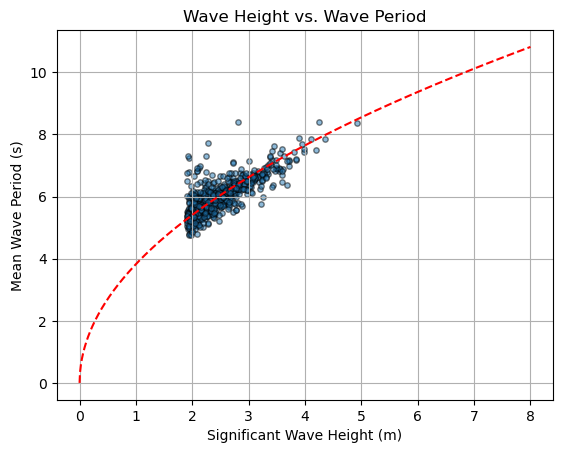

In [94]:
# correlation Hs and Tp (chat)
from sklearn.linear_model import LinearRegression

# Example data: replace with your actual Hs and Tm values
Hs = excess + th  # Significant wave height data
Tm = peaklist['mean_wave_period_(s)'] # Mean or peak wave period data

# Transform Hs
xmatrix = np.sqrt(Hs).reshape(-1, 1)  # Predictor
ymatrix = Tm                         # Response

# Linear regression
model = LinearRegression(fit_intercept=False)  # No intercept, y = a * x
model.fit(xmatrix, ymatrix)

a = model.coef_[0]
print(f"Estimated a: {a:.2f}")

Hsarray = np.linspace(0, 8, 1000)
Tmarray = []
for i in range(len(Hsarray)):
    Tmm = a * np.sqrt(Hsarray[i])
    Tmarray.append(Tmm)

plt.scatter(Hs, Tm, s=15, edgecolors='k', alpha=0.5)
plt.plot(Hsarray, Tmarray, 'r--')
plt.xlabel('Significant Wave Height (m)')
plt.ylabel('Mean Wave Period (s)')
plt.title('Wave Height vs. Wave Period')
plt.grid()
plt.show()

C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_19616\1354474919.py:19: RuntimeWarning: divide by zero encountered in divide
  rtp_MC = 1 / ((1 - cdf_MC) * Ns)
c:\Users\TUDelftSID\anaconda3\envs\CIEM4220_DDB\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\TUDelftSID\anaconda3\envs\CIEM4220_DDB\Lib\site-packages\numpy\lib\_function_base_impl.py:4656: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5,
C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_19616\1354474919.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 10000])


95% upper bound for 250 years return period: 2.40 m
95% lower bound for 250 years return period: 3.21 m


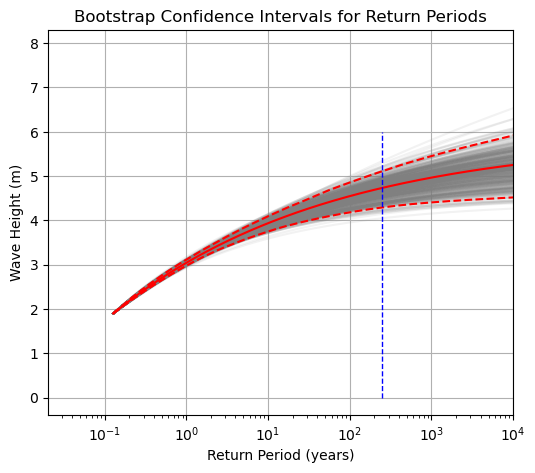

In [ ]:
n_bootstrap = 500
params_bootstrap = []
sample_size = len(excess_sorted) / 2

fig, ax = plt.subplots(figsize=(6, 5))

ax.set_xscale('log')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Wave Height (m)')
bootstrap = []

xthresh = x + th

for i in range(n_bootstrap):
    resampled_data = np.random.choice(excess, size=len(excess), replace=True)
    params_MC = stats.genpareto.fit(resampled_data)
    # pdf_MC = stats.genpareto.pdf(x, *params_MC)
    cdf_MC = stats.genpareto.cdf(x, *params_MC)
    rtp_MC = 1 / ((1 - cdf_MC) * Ns)
    bootstrap.append(rtp_MC)
    ax.plot(rtp_MC, xthresh, color = 'grey', alpha=0.1)

ax.plot(rtp_par, xthresh, 'r-', label='GDP')

# Calculate the 95th percentile interval for the bootstrap lines

rtp_MC_array = np.array(bootstrap)
lower_bound = np.percentile(rtp_MC_array, 2.5, axis=0)
upper_bound = np.percentile(rtp_MC_array, 97.5, axis=0)

ax.plot(lower_bound, xthresh, 'r--', label='Lower Bound (2.5%)')
ax.plot(upper_bound, xthresh, 'r--', label='Upper Bound (97.5%)')

ax.vlines(250, 0, 6, color='b', linestyle='--', linewidth=1)
ax.grid()
ax.set_title('Bootstrap Confidence Intervals for Return Periods')
ax.set_xlim([0, 10000])
per95R_up = xthresh[np.where(upper_bound > 250)][0]
per95R_lo = xthresh[np.where(lower_bound > 250)][0]

print(f"95% upper bound for 250 years return period: {per95R_up:.2f} m")
print(f"95% lower bound for 250 years return period: {per95R_lo:.2f} m")

plt.savefig(f'figures/bootstrap_{n_bootstrap}it.png', dpi=300, bbox_inches='tight')


# Plot the 95th percentile interval
# ax.fill_betweenx(x, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI')
# ax.legend()
# plt.show()



In [93]:
per95R_up = x[np.where(upper_bound > 250)][0]
per95R_lo = x[np.where(lower_bound > 250)][0]
print(f'UB = {per95R_up:.2f} [m]')
print(f'LB = {per95R_lo:.2f} [m]')

UB = 2.40 [m]
LB = 3.21 [m]


In [53]:
wind = pd.read_csv('data\\reanalysis-era5-single-levels-timeseries-WindP2.csv', parse_dates = True, index_col = 0)
display(wind.head())

,u10,v10,latitude,longitude
valid_time,,,,
1940-01-01 00:00:00,4.801086,-3.570221,44.5,12.75
1940-01-01 01:00:00,4.046372,-1.939636,44.5,12.75
1940-01-01 02:00:00,4.128433,-1.721542,44.5,12.75
1940-01-01 03:00:00,3.684341,-2.478043,44.5,12.75
1940-01-01 04:00:00,2.870834,-3.234360,44.5,12.75


In [90]:
Hs = 4.73 - th
print(f"Significant wave height: {Hs:.2f} m")
waves_angle['daatetime'] = waves_angle.index

critwave = waves_angle.iloc[np.argmin(np.abs(waves_angle['significant_wave_height_(m)'].values - Hs))]
datetime = critwave[-1]

critwind = wind.loc[datetime]
u10 = critwind['u10']
v10 = critwind['v10']

wind_speed = np.sqrt(u10**2 + v10**2)
wind_dir = np.arctan2(v10, u10) * 180 / np.pi

print(f"Wind speed: {wind_speed:.2f} m/s")
print(f"Wind direction: {wind_dir:.2f} degrees")

Significant wave height: 2.83 m
Wind speed: 15.69 m/s
Wind direction: -133.33 degrees


C:\Users\TUDelftSID\AppData\Local\Temp\ipykernel_19616\3735657468.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datetime = critwave[-1]


In [96]:
for i in [3.05, 3.96, 4.45, 4.57, 4.73, 4.87, 4.99]:
    print(f'RT:{i} gives {3.82*np.sqrt(i):.2f}')

RT:3.05 gives 6.67
RT:3.96 gives 7.60
RT:4.45 gives 8.06
RT:4.57 gives 8.17
RT:4.73 gives 8.31
RT:4.87 gives 8.43
RT:4.99 gives 8.53
